In [1]:
import tweepy,re
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
# authentication
consumerKey = '6KPsDZhPoLtb8AV3i2QLgmnEB'
consumerSecret = 'Qn9FOMMIacBgWT1es2TFlnC2DVH1UTzPRDS7bBfVHVf94OeCIk'
accessToken = '3316717812-a3OUIsnXFldawLnsFIKqUCA1My2Oa98Znxj8sss'
accessTokenSecret = 'CGd7mtMxIiPyEp0nJd8ondC94d7h9WVTfD236R6KoimIl'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [22]:
searchTerm=input("Enter keyword/tag to search about ")
termNumber=int(input("Enter how many tweets to search "))

tweets=[]
tweetText=[]
#search
tweets = tweepy.Cursor(api.search, q=searchTerm+" -filter:retweets", lang = "en").items(termNumber)


Enter keyword/tag to search about film
Enter how many tweets to search 70


In [23]:
tweet_list=[tweet.text for tweet in tweets]
tweet_list

['Amazing news! Her Majesty&amp;#039;s Musketeers was just selected by Mount Fuji International Film Festival Season 3 vi… https://t.co/aG4mTzhpiZ',
 '@IanMartin I just realised I watched the film https://t.co/cwbYNdKdLD (but a film is not a novel, of course)',
 '@billifant62 Your not only one…\nI started watching it this year..\nHad to buy box set as couldn’t wait to watch next… https://t.co/JiqAgT45GG',
 'did dixie film a mv in paris?! 🤭😮',
 'Pierce Brosnan in promotional shoot in the #JamesBond film #TomorrowNeverDies https://t.co/m2N8wBOaUZ',
 '@BenitoPia1 @digihorse @Frdric50316446 @GraceRandolph Nah #TheSuicideSquad was a great film. Cry about it',
 "@AshiLockie Yeah, I read wrong and thought you meant you'd just watched the Spike Lee film beforehand and they don'… https://t.co/7GX7mmmOn0",
 'Wait what? #Aarey iz naut sabed?\nWell, this was their intention to begin with. Trees, environment blah blah were ne… https://t.co/WiHx9mUXwR',
 'Guilty secret time. I just watched every epi

In [81]:
df=pd.DataFrame(tweet_list)

In [82]:
df

,0
0,Amazing news! Her Majesty&amp;#039;s Musketeer...
1,@IanMartin I just realised I watched the film ...
2,@billifant62 Your not only one…\nI started wat...
3,did dixie film a mv in paris?! 🤭😮
4,Pierce Brosnan in promotional shoot in the #Ja...
...,...
65,"Fantastic action , top 3 mcu origin films. Sim..."
66,Congrats to Coach and Mrs Moose on the arrival...
67,"Recorded an episode with @cinema_recall today,..."
68,Thank you Anna! So glad you enjoyed the film a...


In [83]:
#clean data
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+)"," ",text).split())
df['cleaned_data']=df[0].apply(clean_data)
df.head()

,0,cleaned_data
0,Amazing news! Her Majesty&amp;#039;s Musketeer...,Amazing news Her Majesty amp 039 s Musketeers ...
1,@IanMartin I just realised I watched the film ...,I just realised I watched the film cwbYNdKdLD ...
2,@billifant62 Your not only one…\nI started wat...,Your not only one I started watching it this y...
3,did dixie film a mv in paris?! 🤭😮,did dixie film a mv in paris
4,Pierce Brosnan in promotional shoot in the #Ja...,Pierce Brosnan in promotional shoot in the Jam...


In [84]:
#removal numbers
def drop_number(list_text):
    list_new=[]
    for i in list_text:
        if not re.search('\d',i):
            list_new.append(i)
    return ''.join(list_new)
df['cleaned_data']=df['cleaned_data'].apply(drop_number)
df.head()

,0,cleaned_data
0,Amazing news! Her Majesty&amp;#039;s Musketeer...,Amazing news Her Majesty amp s Musketeers was...
1,@IanMartin I just realised I watched the film ...,I just realised I watched the film cwbYNdKdLD ...
2,@billifant62 Your not only one…\nI started wat...,Your not only one I started watching it this y...
3,did dixie film a mv in paris?! 🤭😮,did dixie film a mv in paris
4,Pierce Brosnan in promotional shoot in the #Ja...,Pierce Brosnan in promotional shoot in the Jam...


In [85]:
# changing all the words of the reviews column to lowercase letters
def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)

df['cleaned_data'] = df['cleaned_data'].apply(lower_case)
df.head()

,0,cleaned_data
0,Amazing news! Her Majesty&amp;#039;s Musketeer...,amazing news her majesty amp s musketeers was ...
1,@IanMartin I just realised I watched the film ...,i just realised i watched the film cwbyndkdld ...
2,@billifant62 Your not only one…\nI started wat...,your not only one i started watching it this y...
3,did dixie film a mv in paris?! 🤭😮,did dixie film a mv in paris
4,Pierce Brosnan in promotional shoot in the #Ja...,pierce brosnan in promotional shoot in the jam...


In [86]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [87]:
df

,0,cleaned_data
0,Amazing news! Her Majesty&amp;#039;s Musketeer...,amazing news her majesty amp s musketeers was ...
1,@IanMartin I just realised I watched the film ...,i just realised i watched the film cwbyndkdld ...
2,@billifant62 Your not only one…\nI started wat...,your not only one i started watching it this y...
3,did dixie film a mv in paris?! 🤭😮,did dixie film a mv in paris
4,Pierce Brosnan in promotional shoot in the #Ja...,pierce brosnan in promotional shoot in the jam...
...,...,...
65,"Fantastic action , top 3 mcu origin films. Sim...",fantastic action top mcu origin films simu was...
66,Congrats to Coach and Mrs Moose on the arrival...,congrats to coach and mrs moose on the arrival...
67,"Recorded an episode with @cinema_recall today,...",recorded an episode with recall today and i ho...
68,Thank you Anna! So glad you enjoyed the film a...,thank you anna so glad you enjoyed the film an...


In [88]:
#lemmatization
lemmatizer=WordNetLemmatizer()
def lemmatise(text):
    text_tokens=word_tokenize(text)
    text_lemm=[lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)
df['cleaned_data']=df['cleaned_data'].apply(lemmatise)
df.head()

    

,0,cleaned_data
0,Amazing news! Her Majesty&amp;#039;s Musketeer...,amazing news her majesty amp s musketeer wa ju...
1,@IanMartin I just realised I watched the film ...,i just realised i watched the film cwbyndkdld ...
2,@billifant62 Your not only one…\nI started wat...,your not only one i started watching it this y...
3,did dixie film a mv in paris?! 🤭😮,did dixie film a mv in paris
4,Pierce Brosnan in promotional shoot in the #Ja...,pierce brosnan in promotional shoot in the jam...


In [89]:
df['cleaned_data'].values

array(['amazing news her majesty amp s musketeer wa just selected by mount fuji international film festival season vi agmtzhpiz',
       'i just realised i watched the film cwbyndkdld but a film is not a novel of course',
       'your not only one i started watching it this year had to buy box set a couldn t wait to watch next jiqagtgg',
       'did dixie film a mv in paris',
       'pierce brosnan in promotional shoot in the jamesbond film tomorrowneverdies mnwboauz',
       'nah thesuicidesquad wa a great film cry about it',
       'yeah i read wrong and thought you meant you d just watched the spike lee film beforehand and they don gxmmmon',
       'wait what aarey iz naut sabed well this wa their intention to begin with tree environment blah blah were ne wihxmuxwr',
       'guilty secret time i just watched every episode of downton abbey and the film i needed a big fix after watching g mvzhearyk',
       'liu s is a curiously affectless performance that can t begin to hold a candle

In [90]:
#removal of stopwords
def remove_stopword(text):
    text_tokens= word_tokenize(text)
    token=[word for word in text_tokens if not word in set(stopwords.words('english'))]
    text_token= ' '.join(token)
    return text_token
df['cleaned_data']=df['cleaned_data'].apply(remove_stopword)
df.head()


,0,cleaned_data
0,Amazing news! Her Majesty&amp;#039;s Musketeer...,amazing news majesty amp musketeer wa selected...
1,@IanMartin I just realised I watched the film ...,realised watched film cwbyndkdld film novel co...
2,@billifant62 Your not only one…\nI started wat...,one started watching year buy box set wait wat...
3,did dixie film a mv in paris?! 🤭😮,dixie film mv paris
4,Pierce Brosnan in promotional shoot in the #Ja...,pierce brosnan promotional shoot jamesbond fil...


In [91]:
def polarity_check(text):
    textblob= TextBlob(str(text.encode('utf-8')))
    pol=textblob.sentiment.polarity
    return pol
df['polarity_num']=df['cleaned_data'].apply(polarity_check)
df.head()


,0,cleaned_data,polarity_num
0,Amazing news! Her Majesty&amp;#039;s Musketeer...,amazing news majesty amp musketeer wa selected...,0.3
1,@IanMartin I just realised I watched the film ...,realised watched film cwbyndkdld film novel co...,0.0
2,@billifant62 Your not only one…\nI started wat...,one started watching year buy box set wait wat...,0.0
3,did dixie film a mv in paris?! 🤭😮,dixie film mv paris,0.0
4,Pierce Brosnan in promotional shoot in the #Ja...,pierce brosnan promotional shoot jamesbond fil...,0.0


In [92]:
#polarity
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol==0):
        return "Neutral"
    elif(pol>0 and pol<=0.3):
        return "Weakly Positive"
    elif(pol>0.3 and pol<=0.6):
        return "Positive"
    elif(pol>0.6 and pol<=1):
        return "Strongly Positive"
    elif(pol>-0.3 and pol<=0):
        return "Weakly Negative"
    elif(pol>-0.6 and pol<=-0.3):
        return "Negative"
    elif(pol>-1 and pol<=-0.6):
        return "Strongly Negative"
    

df['polarity']=df['cleaned_data'].apply(get_polarity)
df.head()


,0,cleaned_data,polarity_num,polarity
0,Amazing news! Her Majesty&amp;#039;s Musketeer...,amazing news majesty amp musketeer wa selected...,0.3,Positive
1,@IanMartin I just realised I watched the film ...,realised watched film cwbyndkdld film novel co...,0.0,Neutral
2,@billifant62 Your not only one…\nI started wat...,one started watching year buy box set wait wat...,0.0,Neutral
3,did dixie film a mv in paris?! 🤭😮,dixie film mv paris,0.0,Neutral
4,Pierce Brosnan in promotional shoot in the #Ja...,pierce brosnan promotional shoot jamesbond fil...,0.0,Neutral


In [96]:
df['polarity'].value_counts()

Neutral              27
Weakly Positive      17
Positive             13
Strongly Positive     6
Weakly Negative       5
Negative              2
Name: polarity, dtype: int64

In [94]:
df.isnull().sum()

0               0
cleaned_data    0
polarity_num    0
polarity        0
dtype: int64

In [103]:
#average reaction
neutral = 0
wpositive = 0
spositive = 0
positive = 0
negative = 0
wnegative = 0
snegative = 0
polarity = 0

for i in range(0,70):
    textblob = TextBlob(str(df['cleaned_data'][i]))
    polarity+= textblob.sentiment.polarity
    pol = textblob.sentiment.polarity
    if (pol == 0):  # adding reaction of how people are reacting to find average later
        neutral += 1
    elif (pol > 0 and pol <= 0.3):
        wpositive += 1
    elif (pol > 0.3 and pol <= 0.6):
        positive += 1
    elif (pol > 0.6 and pol <= 1):
        spositive += 1
    elif (pol > -0.3 and pol <= 0):
        wnegative += 1
    elif (pol > -0.6 and pol <= -0.3):
        negative += 1
    elif (pol > -1 and pol <= -0.6):
        snegative += 1

NoOfTerms=termNumber              
polarity = polarity / NoOfTerms
polarity

0.15874701092558233

In [99]:
# average reaction of people
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')
 
positive = percentage(positive, NoOfTerms)
wpositive = percentage(wpositive, NoOfTerms)
spositive = percentage(spositive, NoOfTerms)
negative = percentage(negative, NoOfTerms)
wnegative = percentage(wnegative, NoOfTerms)
snegative = percentage(snegative, NoOfTerms)
neutral = percentage(neutral, NoOfTerms)



In [100]:
 # Result
print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
print()
print("General Report: ")

if (polarity == 0):
    print("Neutral")
elif (polarity > 0 and polarity <= 0.3):
    print("Weakly Positive")
elif (polarity > 0.3 and polarity <= 0.6):
    print("Positive")
elif (polarity > 0.6 and polarity <= 1):
    print("Strongly Positive")
elif (polarity > -0.3 and polarity <= 0):
    print("Weakly Negative")
elif (polarity > -0.6 and polarity <= -0.3):
    print("Negative")
elif (polarity > -1 and polarity <= -0.6):
    print("Strongly Negative")

print()
print("Detailed Report: ")
print(str(positive) + "% people thought it was positive")
print(str(wpositive) + "% people thought it was weakly positive")
print(str(spositive) + "% people thought it was strongly positive")
print(str(negative) + "% people thought it was negative")
print(str(wnegative) + "% people thought it was weakly negative")
print(str(snegative) + "% people thought it was strongly negative")
print(str(neutral) + "% people thought it was neutral")

How people are reacting on film by analyzing 70 tweets.

General Report: 
Weakly Positive

Detailed Report: 
18.57% people thought it was positive
24.29% people thought it was weakly positive
8.57% people thought it was strongly positive
2.86% people thought it was negative
7.14% people thought it was weakly negative
0.00% people thought it was strongly negative
38.57% people thought it was neutral


In [101]:
sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]',
          'Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
          'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 
          'Strongly Negative [' + str(snegative) + '%]']

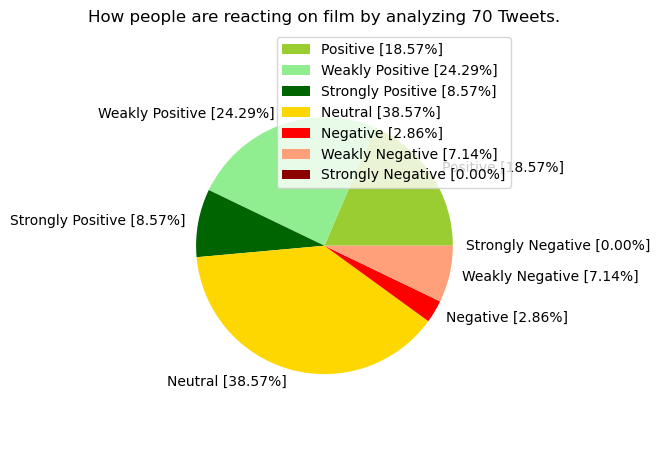

In [102]:
plt.pie(sizes, labels = labels, colors = colors)
plt.legend(labels, loc="best")
plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(NoOfTerms) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()